# Visa Approval Prediction- Supervised Learning Classification Project using Ensemble Methods

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. The goal of this project is to present a data-driven solution analyzing the existing data and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

In [2]:
# For mounting Google Drive to the notebook 
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


## Loading the Dataset

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Data Science/Ensemble Methods/Easy Visa/EasyVisa.csv")

In [4]:
# Make a copy of the dataframe

df=data.copy()

## Data Overview



### Viewing the first and last few rows of the dataset

In [5]:
df.head(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


In [6]:
df.tail(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25470,EZYV25471,North America,Master's,Y,N,2272,1970,Northeast,516.4101,Hour,Y,Certified
25471,EZYV25472,Asia,High School,N,N,40224,1962,Island,75587.4200,Year,Y,Certified
25472,EZYV25473,Asia,High School,N,N,1346,2003,Midwest,76155.6000,Year,N,Certified
25473,EZYV25474,Asia,Bachelor's,Y,N,2421,2007,Northeast,22845.5600,Year,Y,Certified
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.9100,Year,Y,Certified


Cursory Observations

- Case id are all unique ids

- A majority of visa applicant's are from Asia

- Education of employee ranges are varied with High School, Bachelor, Masters and Doctorate

- More employees seem to have prior job experience and very few require job training

- Most employees seem to be on yearly wage

- Most positions sought by employees are full-time

- Most applications tend to be certified

### Checking the shape of the dataset

In [7]:
df.shape

(25480, 12)

There are **25480** rows and **12** columns in the dataset

### Exploring the different datatypes in various columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


- There are 12 columns of which 9 columns are of type object, 2 of type int and 1 of type float

- There are no null values in the dataset

### Checking for missing values

In [9]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

There are no missing values

### Checking for duplicate values

In [10]:
df.duplicated().sum()

0

There are no duplicate values in the dataset

### Removing unneccesary columns from the dataset before EDA

In [11]:
df.case_id.nunique()

25480

- Every case ID is a unique value which provide no useful information for training ML models but may cause issues if its considered a feature in the model used for prediction
- Hence they are dropped from the dataframe before EDA

In [12]:
df=df.drop('case_id', axis=1)

In [13]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


### Statistical Summary

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


Observations:

- No of employees in the employer's company ranges from '-26' to 602069

- Likely there is some typographical error related to the negative no of employess and needs correction

- Median no of employees is 2109 while mean no of employees is 5667 suggesting a right skewed distribution.

- Employer's companies year of establishment spans from 1800 to 2016

- Prevailing wage spans a very wide range from 2 to 319210. Part of this high discrepancy between wages is likely due to unit of wage which can range from hourly, weekly, monthly to yearly

- Mean wage is 74,455 USD while the median wage is 70,308 USD

- Mean and median prevailing wages are close to each other suggesting the distribution may be closer to normal to slightly right skewed

In [15]:
# Summary of the categorical variables

df.describe(include =[object, 'category']).T

,count,unique,top,freq
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


Exploring the distinct categories in these categorical variables

In [16]:
# Making a list of all catrgorical variables
cat_col = list(df.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 50)

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
--------------------------------------------------
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
--------------------------------------------------
Y    22773
N     2707
Name: full_time_position, dty

Observations:

- There are 6 continents from which the visa applicants originates 
- Asia has the largest no of visa applicants with 66% of all applicants
- There are 4 types of education of employeee
- Bachelors degree seem to be the most common educational qualification making up nearly 40% of all applicants
- Nearly 58% of applicants has prior job experience
- ~88% of applicants do not require job training
- Jobs are sought after by the visa applicants in five distinct regions with Northeast being the most sought after region
- Most prevailing wages are for yearly jobs
- Most positions are full time positions (~90%)
- Nearly 2/3 of all visa applications are certified

### Correcting the negative values in the no of employees column

In [17]:
# Checking how many entries of no of employees are negative

df.loc[df['no_of_employees']<0].shape[0]

33

Comments

- There are 33 negative entries in the no of employees field

- These are likely typographical errors

- We can correct them by making those values positive

In [18]:
# Taking the absolute value of the no of employees 
df['no_of_employees']=abs(df['no_of_employees'])

In [19]:
df.loc[df['no_of_employees']<0].shape[0]

0

- There are no more negative values in the no of employees column

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

## Pre-defined functions for EDA and data visualization

In [20]:
# Function to create histogram and boxplot 

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [21]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [22]:
### Function to plot stacked bar charts for categorical columns

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [23]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

## Univariate Analyses

#### **No of Employees**

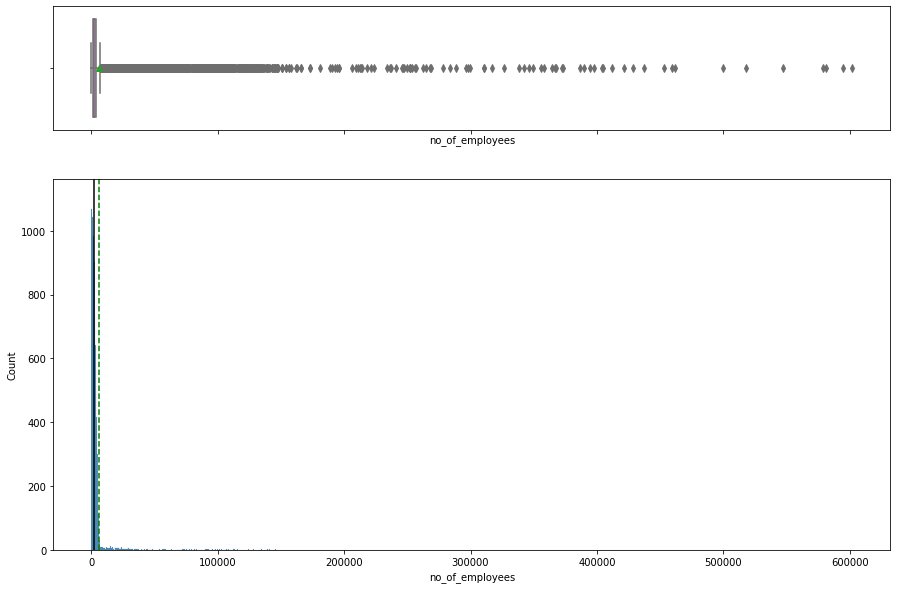

In [24]:
histogram_boxplot(df, "no_of_employees")

- Distribution appears to be right skewed with a number of outliers on the right
- A number of companies have 100,000 to 600,000 employees


#### **Prevailing Wage**

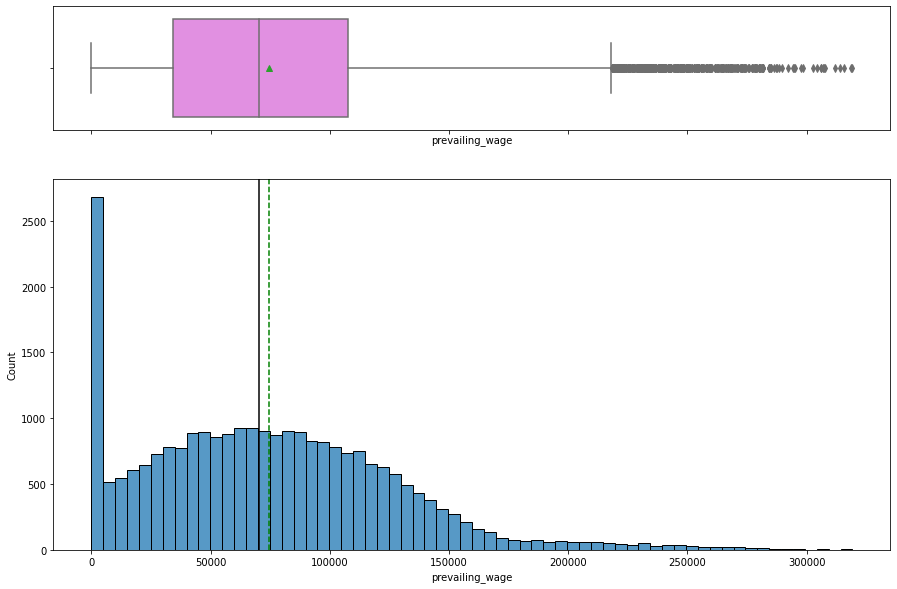

In [25]:
histogram_boxplot(df, "prevailing_wage")

- Prevailing wage appear to be approximately normal distribution to slightly right skewed distribution.

- There are a number of outliers on the right

- There also a large spike near zero which may likely be due to lower wages if the unit of wage is different- e.g annual vs hourly. This needs to be further examined

#### Lets examine prevailing wages with respect to units of wage

In [26]:
# Dataset with annual wages only
df_yearly=df[df['unit_of_wage']=='Year']

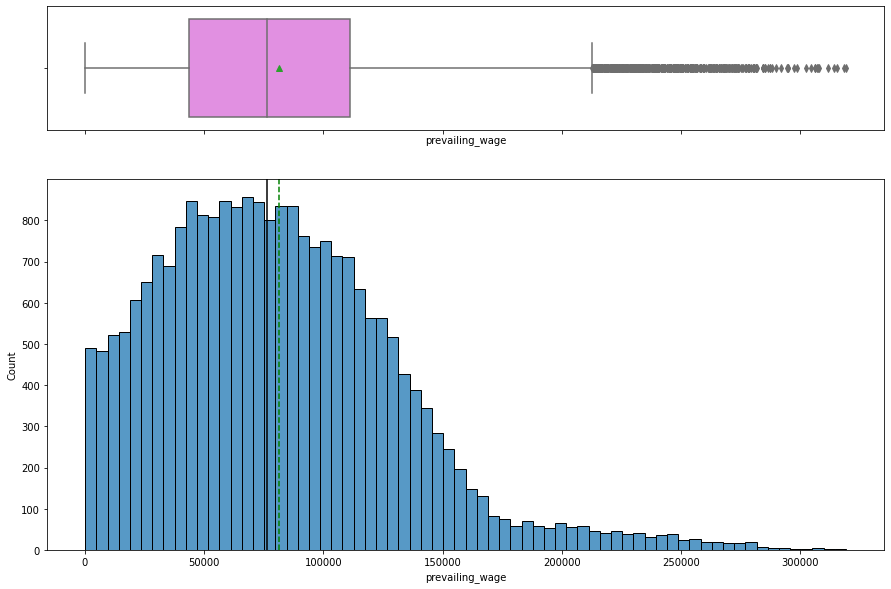

In [27]:
histogram_boxplot(df_yearly, "prevailing_wage")

- Distribution appears normal to right skewed
- Most outliers are on the right
- Large spike on the low end has somewhat come down suggesting indeed some of those low salaries were on a different unit of prevailing wage

In [28]:
# Dataset with monthly wages only
df_monthly=df[df['unit_of_wage']=='Month']

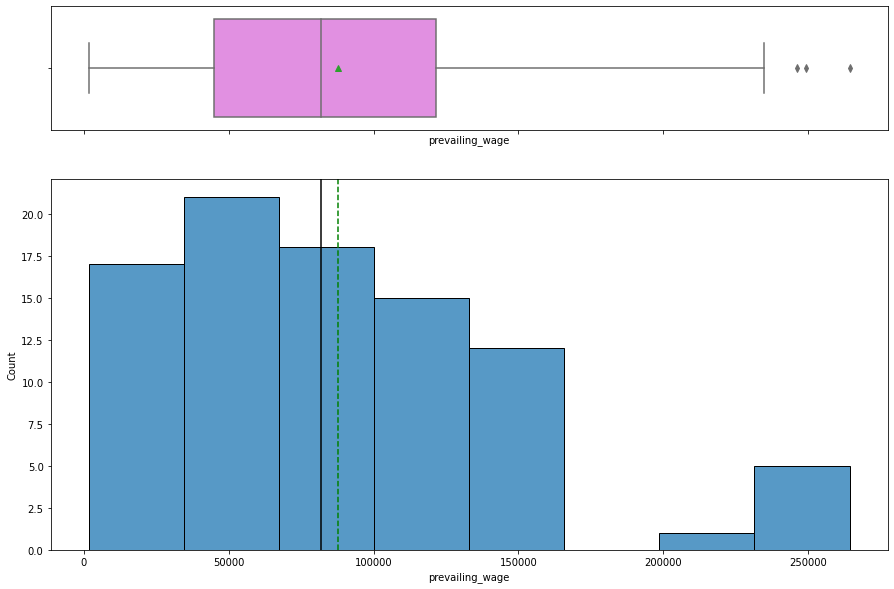

In [29]:
histogram_boxplot(df_monthly, "prevailing_wage")

- There are very few salaries reported on a monthly unit of prevailing wage

- Most of the salaries appear quite high if they were converted to an yearly basis 

- It's possible that these entries are actually yearly salaries mislabled as monthly 

- Its not outside the realm of possibility for these individuals to have extremely high paying jobs (upwards of 600 K USD for a monthly salary of 50K going up to 3 million USD for a monthly salary of 250 K) but it seems very improbable


In [30]:
# Dataset with weekly wages only
df_weekly=df[df['unit_of_wage']=='Week']

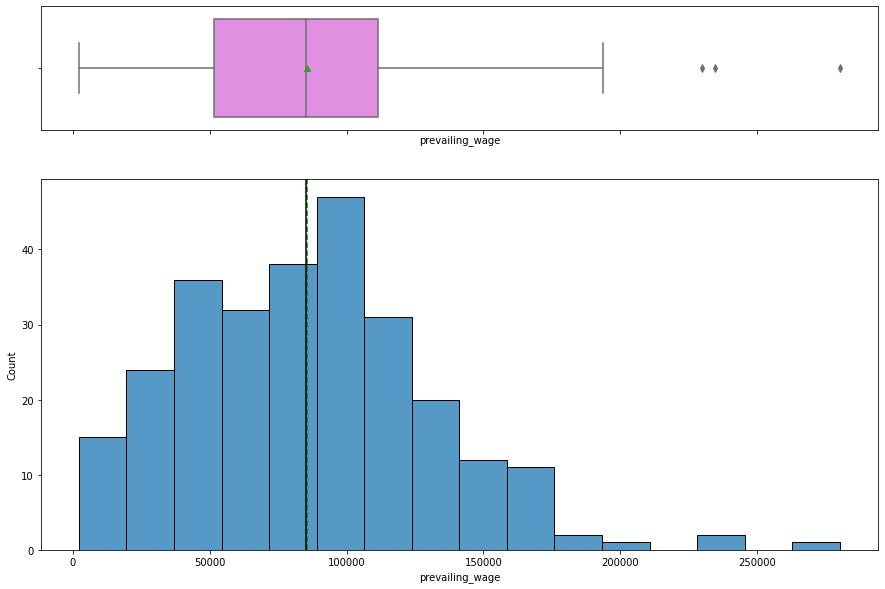

In [31]:
histogram_boxplot(df_weekly, "prevailing_wage")

- There are very few salaries reported as weekly unit of wage

- Salaries appear to be very high for weekly salaries and are likely annual salaries reported as weekly salary by mistake

In [32]:
# Dataset with weekly wages only
df_hourly=df[df['unit_of_wage']=='Hour']

In [33]:
# No of Salaries reported hourly
df_hourly.shape[0]

2157

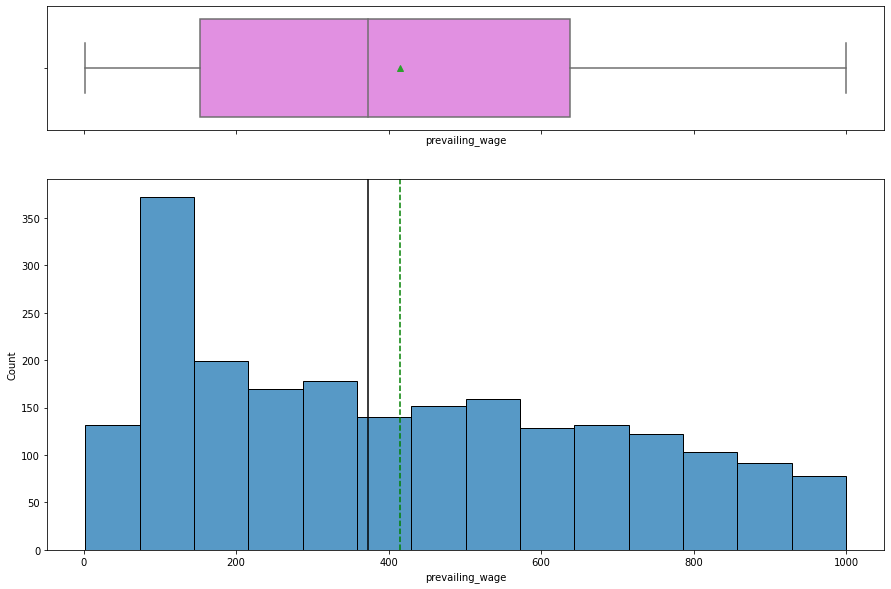

In [34]:
histogram_boxplot(df_hourly, "prevailing_wage")

Final Thoughts on Prevailing wage

- There appears to be some data under prevailing wage that appears to be typographical errors particularly under the unit of wages: Hour, Week and Month

- However, it is not entirely clear if these data have been normalized to an annual basis but it certainly appears so in some cases as otherwise some salaries would appear to be appalingly high

- Without further additional data, it is not clear at the moment as to which data should be treated and which should be left alone

- In lieu of this, no data treatment on prevailing wages have been made

- Given that weekly and monthly make up a negligible part of the total dataset and some of that hourly data may be normalized to an annual basis or accurate, this should hopefully not have a big effect on final prediction in the ML models

#### **Unit of Wage**

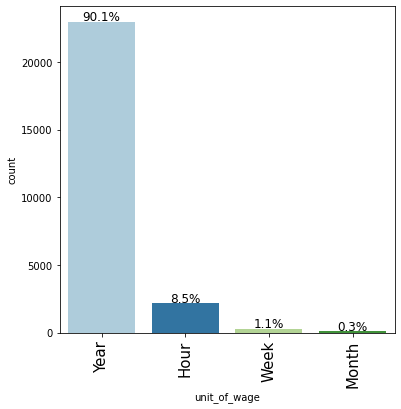

In [35]:
labeled_barplot(df, "unit_of_wage", perc=True);

- Most salaries are reported as yearly wages
- Nearly 8.5% of salaries are reported as hourly wages
- Very few entries are reported as weekly and monthly wage 

#### **Continent**

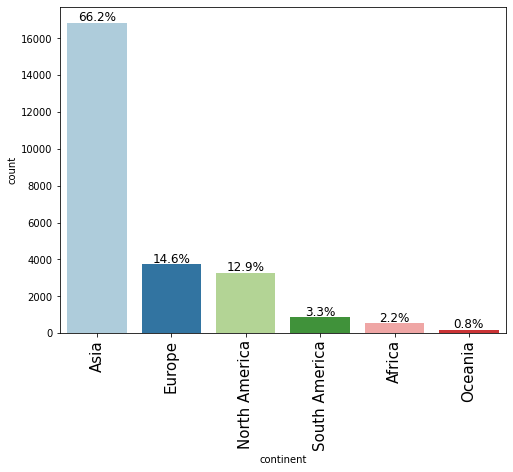

In [36]:
labeled_barplot(df, "continent", perc=True);

- Majority of visa applicants are from Asia (66%)
- Europe and North America have the two next higher visa applicants (14.6 and 12.9%)
- Oceania have very few applicants (< 1%)

#### **Education of Employeee**

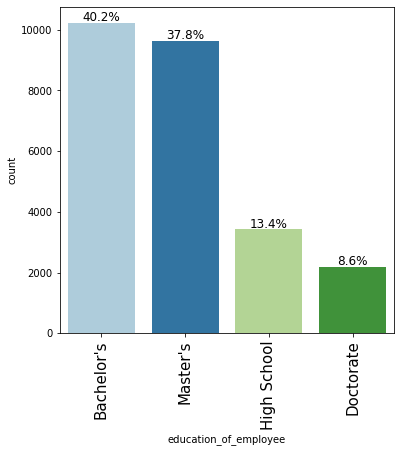

In [37]:
labeled_barplot(df, "education_of_employee", perc=True);

- Most applicants have either a bachelor's degree (40.2%) or a Masters degree (37.8%)

- Applicants with a doctorate are far fewer compared to bachelors and masters (8.6%)

- Only High school education also makes up a smaller fraction of visa applciants (13.4%)

#### **Job Experience**

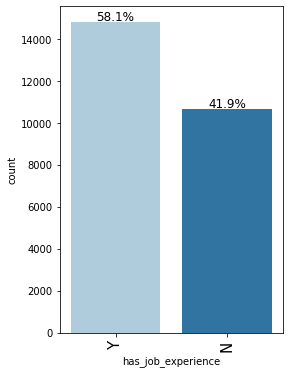

In [38]:
labeled_barplot(df, "has_job_experience", perc=True);

- Majority of visa applicants have prior job experience (58%)

#### **Job Training**

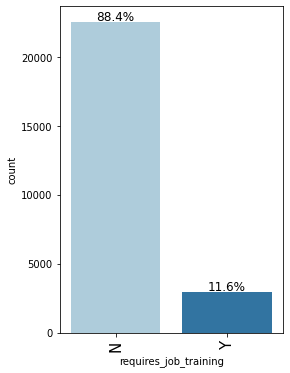

In [39]:
labeled_barplot(df, "requires_job_training", perc=True);

- Vast majority (88.4%) of visa applicants do not require job training

#### **Region Of Employment**

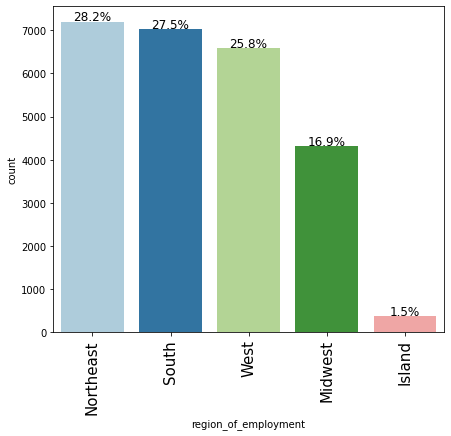

In [40]:
labeled_barplot(df, "region_of_employment", perc=True);

- Northeast US seems to be most desired and sought after job location amongst visa applicants (28.2%)

- South and Western US are not far behind being the choice for 27.5 and 25.8% of applicants

#### **Full Time Position**

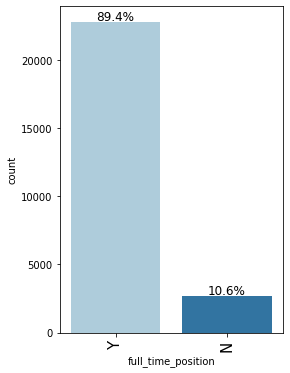

In [41]:
labeled_barplot(df, "full_time_position", perc=True);

- Most visa applicants (~90%) seek a full time position

#### **Case Status**

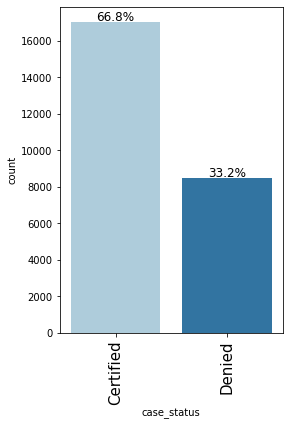

In [42]:
labeled_barplot(df, "case_status", perc=True);

- Nearly 2/3rd of visa applicants are certifed to recieve a visa
- Nearly 1 in 3 applicants are denied a Visa
- We will be exploring further as what features/attributes increase the likelihood of visa denial

## Bivariate Analyses

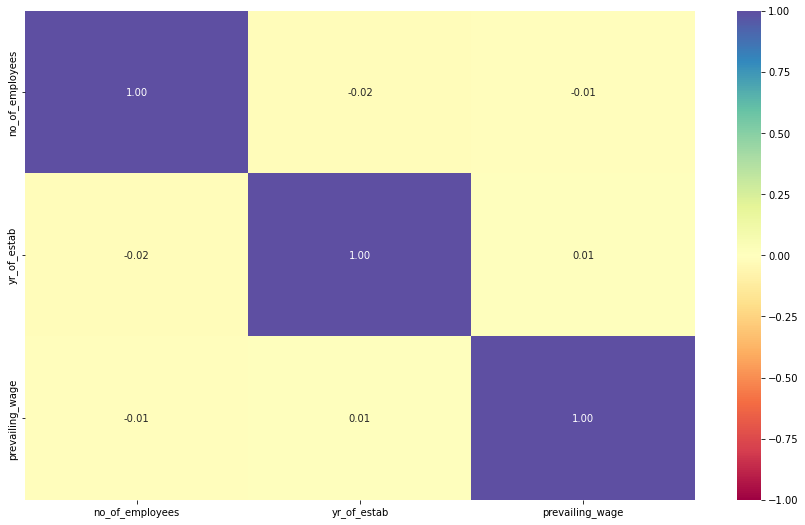

In [43]:
# creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 9))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- There is no correlation between `prevailing_wage`, `yr_of_estab` and `no_of_employees`

#### **Continent vs Case Status**

Q2. How does the visa status vary across different continents? 


case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


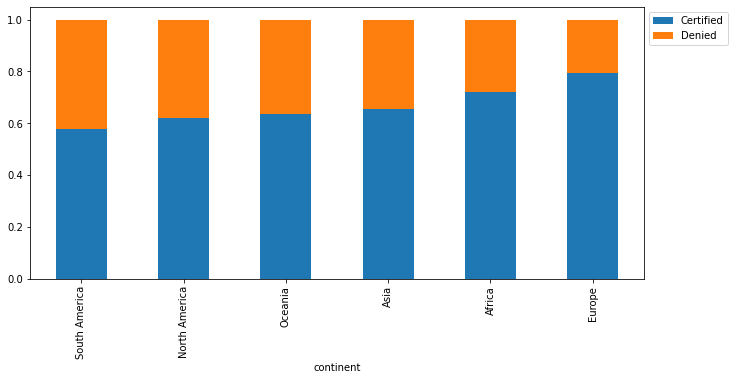

In [44]:
stacked_barplot(df,'continent','case_status')

- Applicants from Europe have the highest likelihood of getting their visa approved (nearly 80% rate of visa approval)

- Visa approval in decreasing order of likelihood after Europe are Africa > Asia > Oceania > North America > South America

- Overall, chances of visa approval is higher than visa rejection across all continents

#### **Education of Employee vs Case Status**

Q1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 



case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


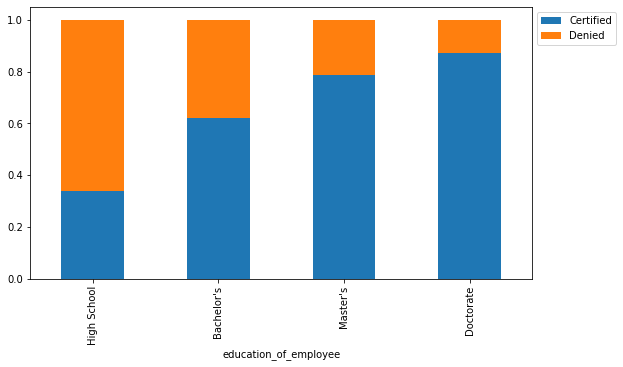

In [45]:
stacked_barplot(df,'education_of_employee','case_status')

- Education of employee is broadly correlated with chances of success of visa approval
- Chances of visa approval in decreasing order of likelihood is in applicants with a Doctorate (87%) > Masters (79%) > Bachelors (62%) > High School (34%)
- Chances of visa approval is **higher** than chances of rejection for bachelors, master's and doctorate degree holders
- Chances of visa approval is **lower** than chances of rejection for applicants with a high school diploma

#### **Job experience vs Case Status**

Q3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


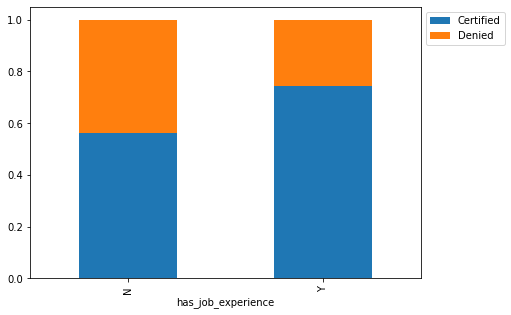

In [46]:
stacked_barplot(df,'has_job_experience','case_status')

- Work experience is correlated with chances of success in visa approval

- Visa applicants with job experience have a ~75% chance of success in visa approval compared to only 56% with those without job experience


#### **Job Training vs Case Status**

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


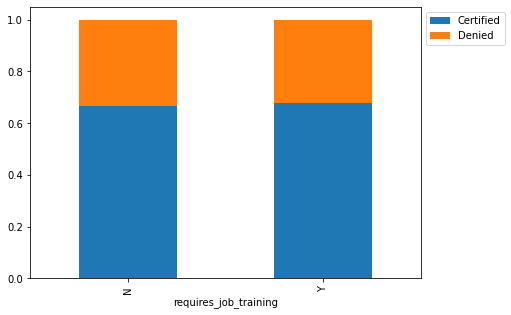

In [47]:
stacked_barplot(df,'requires_job_training','case_status')

- Visa approval is not related to whether an applicant would require job training or not
- Chances of visa approval is nearly the same whether or not the applicant requires or not require job training

#### **Region of employment vs Case Status**

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


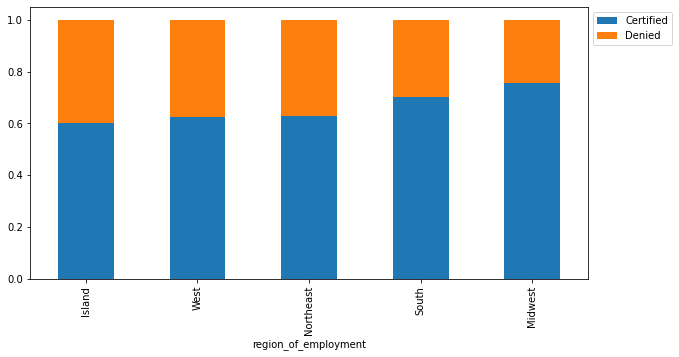

In [48]:
stacked_barplot(df,'region_of_employment','case_status')

- Chances of visa approval seem to vary depending on the applicant's intended region of employment
- Candidate seeking Midwestern US seem to have the highest chance of success at ~75%
- Visa applicants chances of visa approval in decreasing order based on intended region of employment: Midwest > South > North East > West > Island 
- Overall, chances of visa approval is higher than chances of rejection irrespective of candidates intended employment region

#### **Unit of Wage vs Case Status**

Q4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 


case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


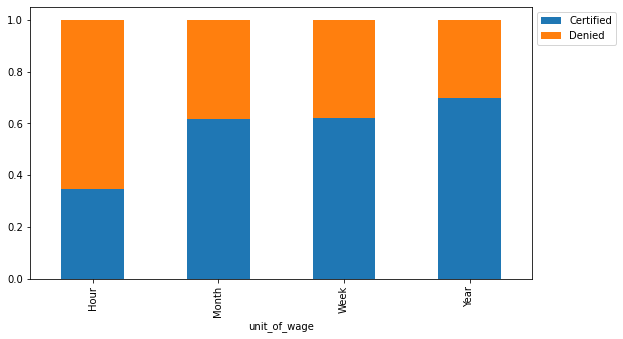

In [49]:
stacked_barplot(df,'unit_of_wage','case_status')

- Applicants on a yearly salarly are most likely to get their visa approved (~70%)

- Applicants on a hourly salary only have a 35% chance of visa approval- a higher chance of rejection than approval

- Applicants on yearly, weekly and monthly salaries all have a higher chance of visa approval compared to visa rejection

#### **Full time position vs Case Status**

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


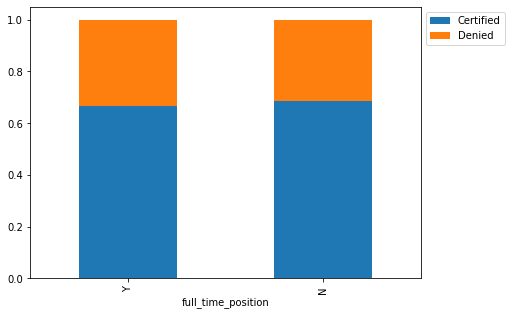

In [50]:
stacked_barplot(df,'full_time_position','case_status')

- Candidates with or without a full time position have roughly similar chances of visa approval

#### **Prevailing wage vs Case Status**

Q5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

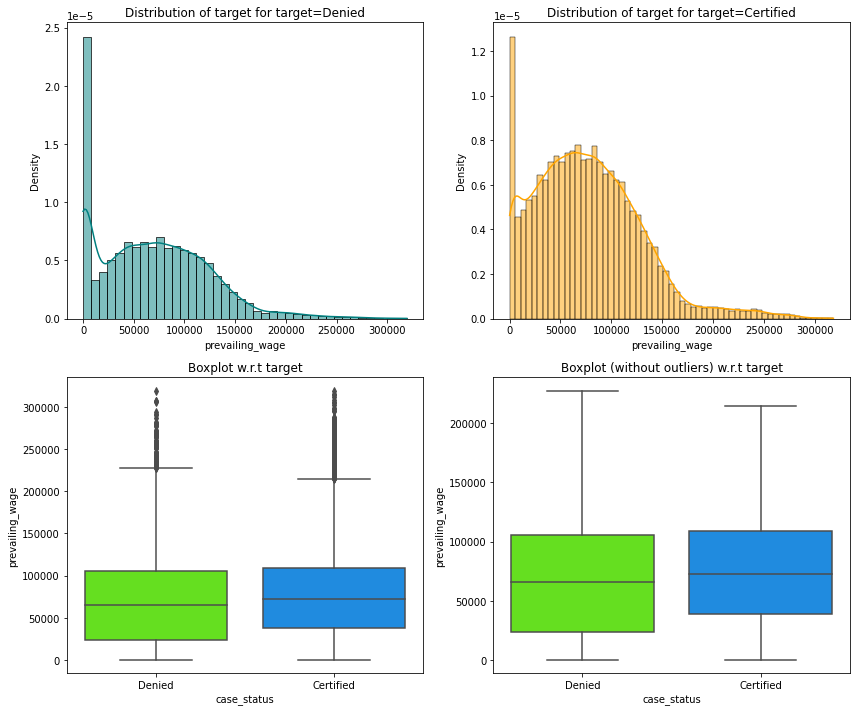

In [51]:
distribution_plot_wrt_target(df,'prevailing_wage','case_status')

- There do not appear a strong relationship between prevailing wages and case status
- Wage distribution for certifed and denied applicants appear to be very similar with a spike at the low end and a number of right outliers on the high end of wages
- Median prevailing wages appear to be slightly higher for certified applicants vs denied applicants
- Therefore very broadly, higher prevailing wages may have a slightly better chance of visa approval 

#### **No_of_employees vs Case Status**

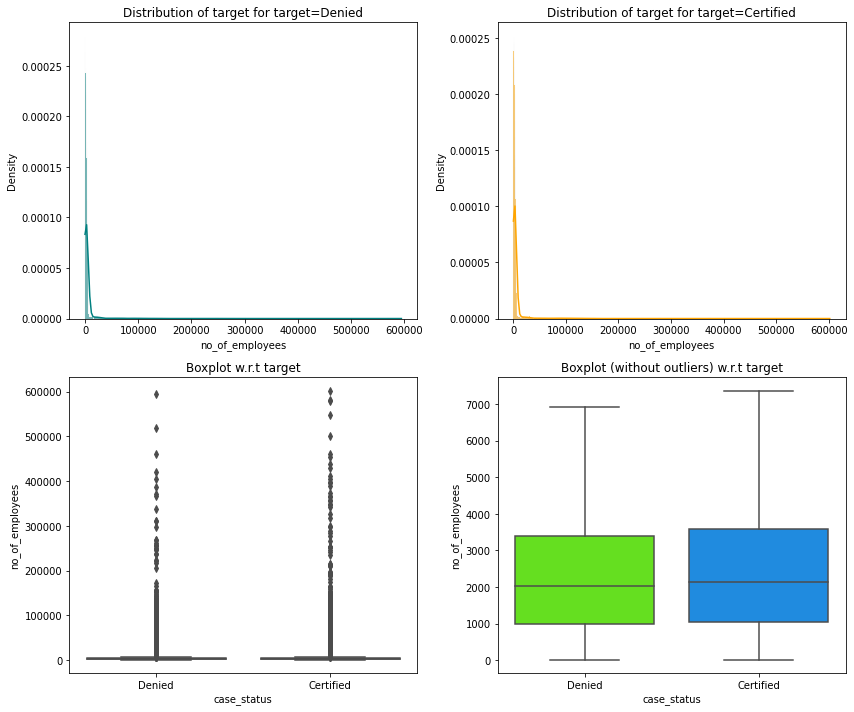

In [52]:
distribution_plot_wrt_target(df,'no_of_employees','case_status')

- Broadly, there seems to be no relationship between the size of companies (i.e no of employees working in a company) and chances of visa approval/denial


#### **Prevailing wage vs Education of employee**

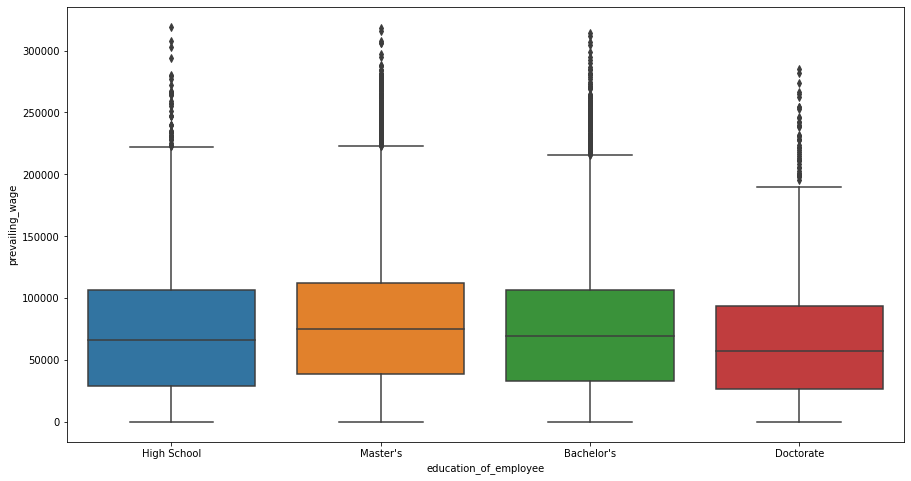

In [53]:
plt.figure(figsize = (15,8))
sns.boxplot(data=df, x='education_of_employee', y='prevailing_wage');

- High school , Bachelor's and Masters degree holders seem to span a broadly similar range in prevailing wages
- Applicants with a masters degree seem to earn the highest median prevailing wage 
- Doctorates seem to earn the lowest median wage and span the lowest range in prevailing wages compared to other groups (excluding outliers)
- Broadly, prevailing wages do not seem to correlate strongly with education of employee

#### **Prevailing wage vs Job Experience**

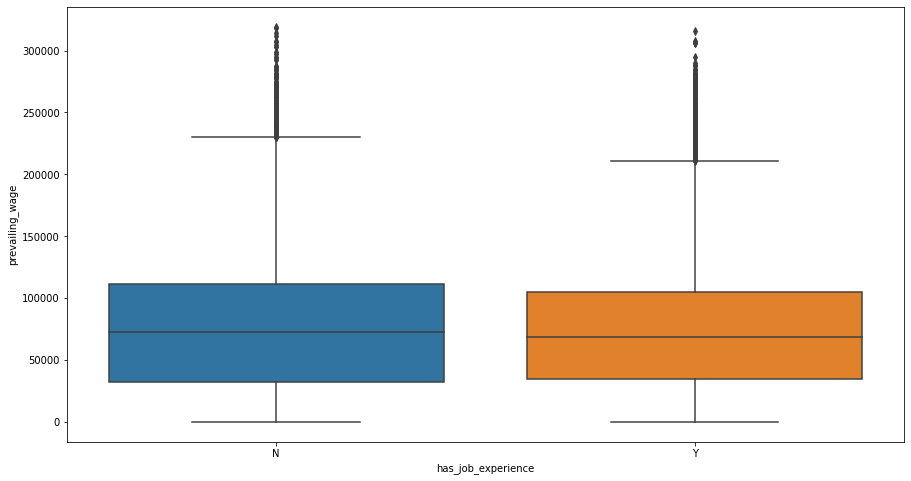

In [54]:
plt.figure(figsize = (15,8))
sns.boxplot(data=df, x='has_job_experience', y='prevailing_wage');

- Broadly, prevailing wages do not seem to correlate strongly with employees previous job experience

- Employees without previous job experience seem to span a slightly wider range in prevailing wages and have a slightly higher median prevailing wage compared to employees with previous job experience


#### **Prevailing wage vs Region of employment**

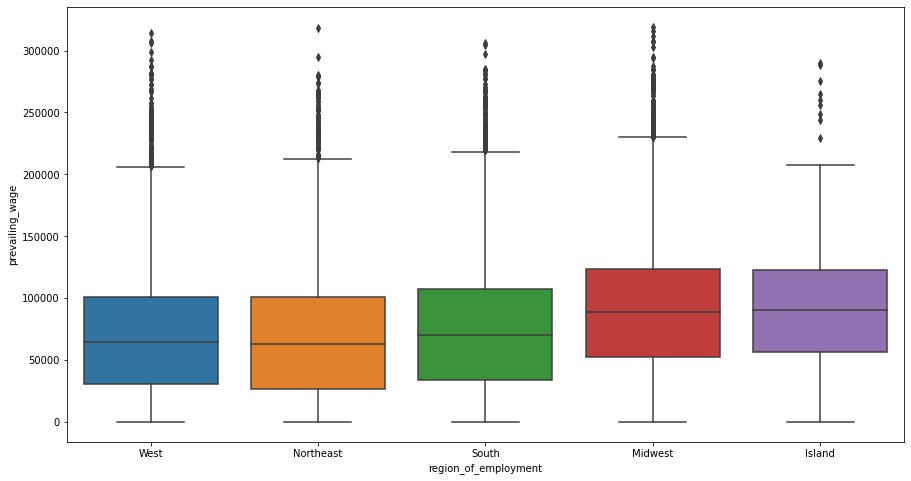

In [55]:
plt.figure(figsize = (15,8))
sns.boxplot(data=df, x='region_of_employment', y='prevailing_wage');

- Employees seeking jobs in the Midwest and Island regions earn higher median prevailing wages compared to employees seeking jobs in the West, Northeast and Southern US

## Data Preprocessing


### Outlier Detection

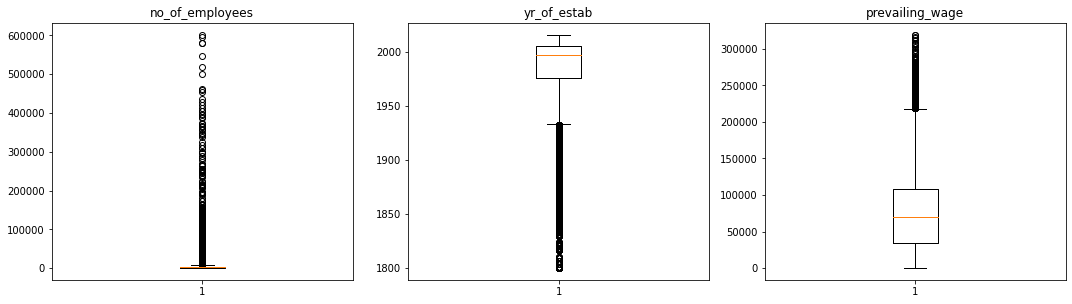

In [56]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- There are a number of outliers in all of the numerical variables

- However, these values represent actual variation in the data and thus no outlier treatment should be performed

## Data Preparation for Modeling

- We would need to encode the target variable `case_status`
- We would encode Certified as 1 and denied as 0
- Our goal is to predict when visa will be certified

In [57]:
# Encoding the target variable

df["case_status"] = df["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

- We will have to encode categorical features as dummy variables before we build the model

- We will split the data into train and test sets (70:30) so that we can evaluate the model we build on the train data.

In [58]:
#Separating features and the target column
X = df.drop("case_status", axis=1)
y = df["case_status"]

In [59]:
# encoding categorical variables as dummy variables 
X = pd.get_dummies(X, drop_first=True)

* When classification problems exhibit a imbalance in the distribution of the target classes, it is good to use stratified sampling (using parameter `stratify`) to ensure that relative class frequencies are approximately preserved in train and test sets. 

In [60]:
#Splitting the data into train and test sets preserving the certified:denied ratio in both sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

In [61]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


## Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will not get certified but in reality, the visa application should get certified [**False Negative**]

2. Model predicts that the visa application will get certified but in reality, the visa application should get denied [**False Positive**]


### Which case is more important? 
* Both the cases are important as:

* If a visa gets denied when it had to be certified, the country loses a suitable human resource who can contribute to the economy. 

* If a visa gets certified when it had to be denied, an undeserving candidate may fill the job position while US citizens will miss out on the opportunity to work in that position.


### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model. The goal should be to maximize the F1 score as that increases the chances of predicting both classes correctly and minimizing both False Negatives and False Positives

* We will use balanced class weights so that model focuses equally on both classes.

### Functions to calculate performance metrics and create confusion matrix for different models

In [62]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [63]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree

In [64]:
# Define decision tree model
dtree = DecisionTreeClassifier(random_state=1)

#Fit decision tree model
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

#### Model performance on training data

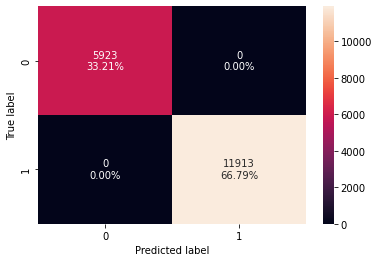

In [65]:
# Confusion matxrix for train data
confusion_matrix_sklearn(dtree,X_train,y_train)

In [66]:
dtree_train_perf=model_performance_classification_sklearn(dtree,X_train,y_train)

dtree_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Model performance on test data

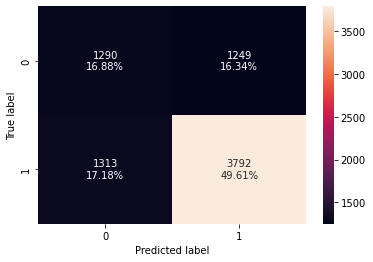

In [67]:
# Confusion matxrix for test data
confusion_matrix_sklearn(dtree,X_test,y_test)

In [68]:
dtree_test_perf=model_performance_classification_sklearn(dtree,X_test,y_test)

dtree_test_perf

,Accuracy,Recall,Precision,F1
0,0.664835,0.742801,0.752232,0.747487


### Comments on general Decision tree model

- The decision tree model is extrememly overfitting the training data

- Training metrics have perfect scores but the testing performance is quite poor and the model is not able to generalize well on unseen data

- F1_score for the test set is only 0.75

- We can try to improve model performance by hyperparameter tuning 

## Hyperparameter Tuning - Decision Tree

In [69]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight="balanced",random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,16,4), 
              'min_samples_leaf': [1, 2, 3, 5, 7],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.0001,0.001,0.01]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, random_state=1)

#### Model performance on training data

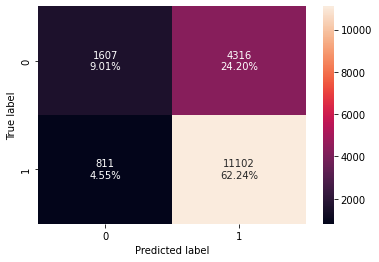

In [70]:
# Confusion matxrix for train data
confusion_matrix_sklearn(dtree_estimator,X_train,y_train)

In [71]:
dtree_tuned_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)

dtree_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.712548,0.931923,0.720067,0.812411


#### Model performance on test data

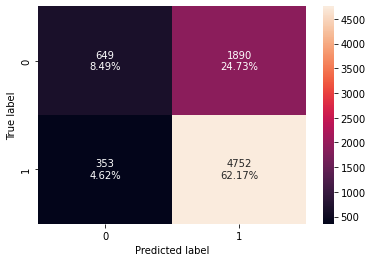

In [72]:
# Confusion matxrix for test data
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

In [73]:
dtree_tuned_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)

dtree_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.706567,0.930852,0.715447,0.809058


### Comments on Hyperparameter tuned Decision Tree

- Hyperparameter tuned decision tree is not overfitting the dataset

- F1 score on the test data has improved to 0.81

- Recall score is pretty high (0.93)

- Model seem to generalize better on test data as the F1 scores of train and test data are similar

# Bagging Models

## Bagging Classifier

In [74]:
# Define bagging classifier model
bagging = BaggingClassifier(random_state=1)

# Fitting bagging classifier
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

#### Model performance on training data

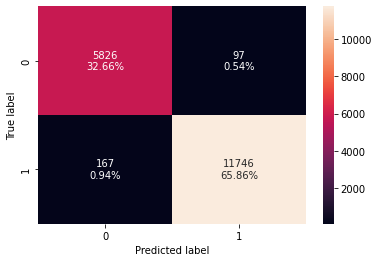

In [75]:
# Confusion matxrix for train data
confusion_matrix_sklearn(bagging,X_train,y_train)

In [76]:
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging,X_train,y_train)

bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.985198,0.985982,0.99181,0.988887


#### Model performance on test data

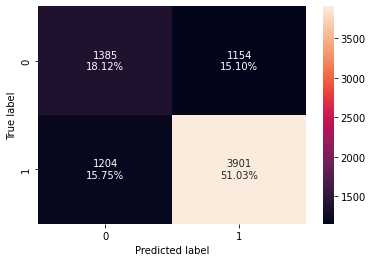

In [77]:
# Confusion matxrix for test data
confusion_matrix_sklearn(bagging,X_test,y_test)

In [78]:
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging,X_test,y_test)

bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.691523,0.764153,0.771711,0.767913


### Comments on Bagging Classifier model

- The bagging classifier model is overfitting the training data

- Training metrics have near perfect scores but the testing performance is quite poor and the model is not able to generalize well on unseen data

- F1_score for the test set is only 0.77

- We can try to improve model performance by hyperparameter tuning

## Hyperparameter Tuning- Bagging Classifier

In [80]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.9], 
              'max_features': [0.7,0.9],
              'n_estimators' : np.arange(90, 111, 10),
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

#### Model performance on training data

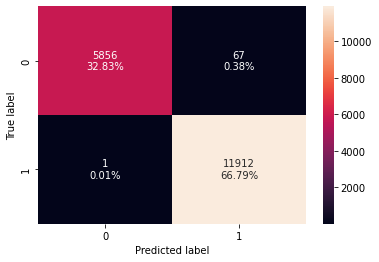

In [81]:
# Confusion matxrix for train data
confusion_matrix_sklearn(bagging_estimator_tuned,X_train,y_train)

In [82]:
bagging_classifier_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)

bagging_classifier_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.996187,0.999916,0.994407,0.997154


#### Model performance on test data

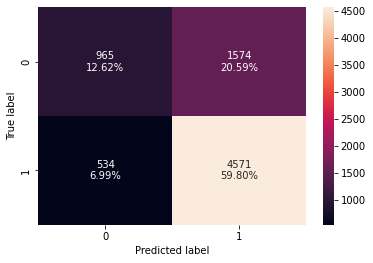

In [83]:
# Confusion matxrix for test data
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

In [84]:
bagging_classifier_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)

bagging_classifier_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.724228,0.895397,0.743857,0.812622


### Comments on Bagging Classifier hyperparameter tuned model

- The bagging classifier tuned model is still overfitting the training data

- Training metrics have near perfect scores but the testing performance is much poorer in comparison and will not generalize well on unseen data

- F1_score for the test set is 0.81



## Random Forest Classifier

In [85]:
# Define random forest classifier model
rf = RandomForestClassifier(random_state=1)

# Fit Random forest classifier model
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

#### Model performance on training data

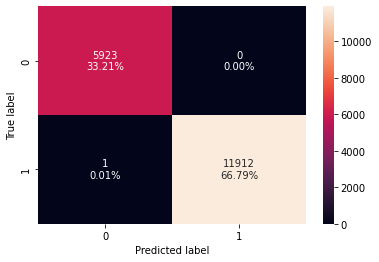

In [86]:
# Confusion matxrix for train data
confusion_matrix_sklearn(rf,X_train,y_train)

In [87]:
rf_classifier_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)

rf_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.999944,0.999916,1.0,0.999958


#### Model performance on test data

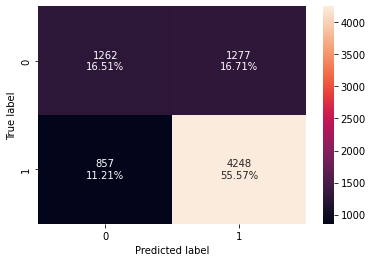

In [88]:
# Confusion matxrix for test data
confusion_matrix_sklearn(rf,X_test,y_test)

In [89]:
rf_classifier_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)

rf_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.720827,0.832125,0.768869,0.799247


### Comments on Random Forest Classifier model

- The random forest classifier model is overfitting the training data

- Training metrics have near perfect scores but the testing performance is quite poor and the model is not able to generalize well on unseen data

- F1_score for the test set is only 0.8

- We can try to improve model performance by hyperparameter tuning

## Random Forest Classifier- Hyperparameter Tuning

In [90]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=3,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=7,
                       n_estimators=25, oob_score=True, random_state=1)

#### Model performance on training data

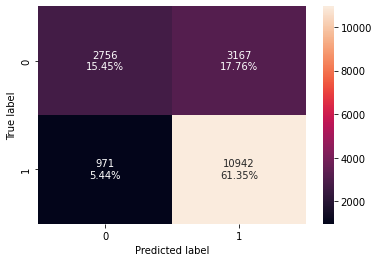

In [91]:
# Confusion matxrix for train data
confusion_matrix_sklearn(rf_tuned,X_train,y_train)

In [92]:
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)

rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.767997,0.918492,0.775533,0.840981


#### Model performance on test data

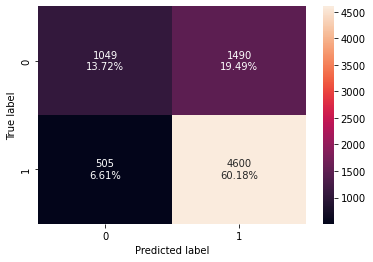

In [93]:
# Confusion matxrix for test data
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

In [94]:
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)

rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.739011,0.901077,0.755337,0.821795


### Comments on tuned Random forest classifier model

- Hyperparameter tuned random forest classifier is not overfitting the dataset

- F1 score on the test data is 0.82

- Model seem to generalize well on test data as the metric scores of train and test data are similar

# Boosting models

## AdaBoost Classifier

In [95]:
#declaring the model
ab_classifier = AdaBoostClassifier(random_state=1)

#Fitting the model
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

#### Model performance on training data

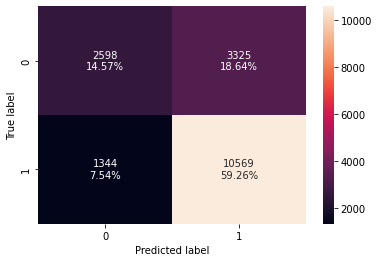

In [96]:
# Confusion matxrix for train data
confusion_matrix_sklearn(ab_classifier,X_train,y_train)

In [97]:
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)

ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.81908


#### Model performance on test data

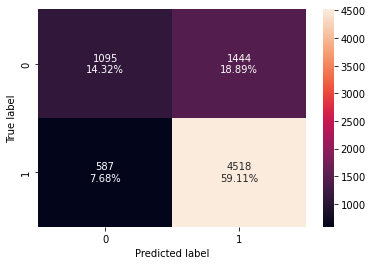

In [98]:
# Confusion matxrix for test data
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

In [99]:
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)

ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481


### Comments on Ada boost classifier

- Model is not overfitting on training data unlike the decision tree, bagging classifier and random forest models

- Model is generalizing quite well with pretty similiar metrics on training and test data

- F1 score on test data is 0.82

- F1 score is similar to the tuned Boosting models (tuned Decision tree, tuned Baggging classifier and tuned Random forest) but not more improved in terms of performance

## Ada Boost Classifier- Hyperparameter Tuning

In [100]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1,class_weight="balanced", random_state=1),
                      DecisionTreeClassifier(max_depth=2,class_weight="balanced", random_state=1)],
    "n_estimators": np.arange(80,101,10),
    "learning_rate":np.arange(0.1,0.5,0.1)
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

#### Model performance on training data

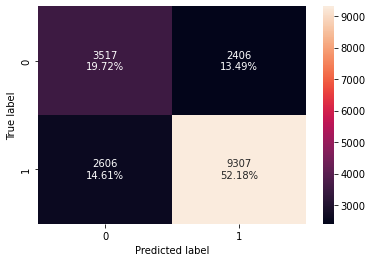

In [101]:
# Confusion matxrix for train data
confusion_matrix_sklearn(abc_tuned,X_train,y_train)

In [102]:
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)

abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.718995,0.781247,0.794587,0.787861


#### Model performance on test data

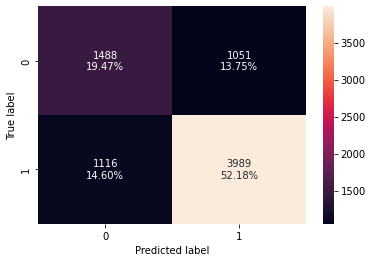

In [103]:
# Confusion matxrix for test data
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

In [104]:
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)

abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.71651,0.781391,0.791468,0.786397


### Comments on tuned Ada Boost Clasifier 

- Tuned Ada boost classifier is not overfitting on training data and generalizing well

- Performance of the tuned model is very slightly poorer in terms of F1 score relative to default Ada Boost model



## Gradient Boosting Classifier

In [105]:
#declaring the model
gb_classifier = GradientBoostingClassifier(random_state=1)

#Fitting the model
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

#### Model performance on training data

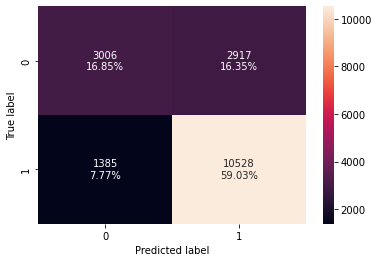

In [106]:
# Confusion matxrix for train data
confusion_matrix_sklearn(gb_classifier,X_train,y_train)

In [107]:
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)

gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.758802,0.88374,0.783042,0.830349


#### Model performance on test data

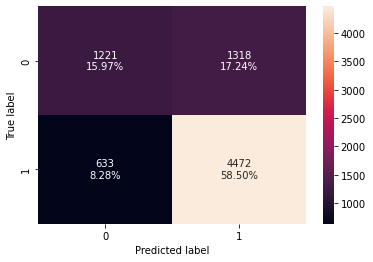

In [108]:
# Confusion matxrix for test data
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

In [109]:
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)

gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744767,0.876004,0.772366,0.820927


### Comments on Gradient Boosting(GB) Classifier

- GB classifier is not overfit like the non-tuned bagging models and generalizes well on test data
- In terms of performance, GB classifier performs pretty well with a F1 score of 0.82

## Gradient Boosting Classifier- Hyperparameter Tuning

In [110]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.8,0.9,1],
    "learning_rate": np.arange(0.1, 0.21, 0.1)
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=150, random_state=1,
                           subsample=1)

#### Model performance on training Data

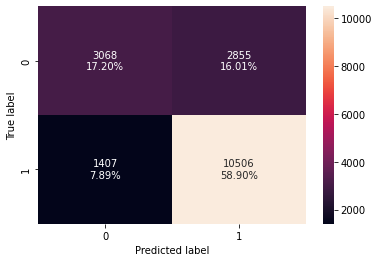

In [111]:
# Confusion matxrix for train data
confusion_matrix_sklearn(gbc_tuned,X_train,y_train)

In [112]:
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)

gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.761045,0.881894,0.786318,0.831368


#### Model performance on test data

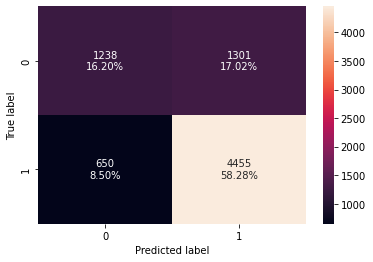

In [113]:
# Confusion matxrix for test data
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

In [114]:
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)

gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744767,0.872674,0.773975,0.820366


### Comments on tuned Gradient Boosting Classifier

- There is not a significant change in performance after tuning the GB classifier 
- Tuned model still generalizes pretty well like the default GB model

## XG Boost Classifier

In [115]:
#declaring the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')

#Fitting the model
xgb_classifier.fit(X_train,y_train)


XGBClassifier(eval_metric='logloss', random_state=1)

#### Model Performance on training data

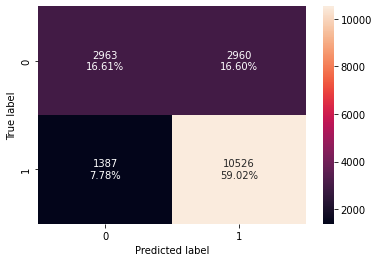

In [116]:
# Confusion matxrix for train data
confusion_matrix_sklearn(xgb_classifier,X_train,y_train)

In [117]:
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)

xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.756279,0.883573,0.780513,0.828852


#### Model performance on test data

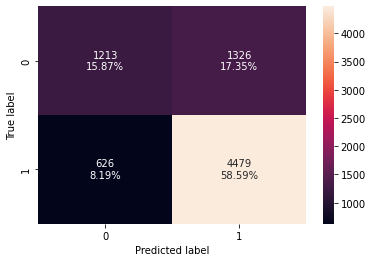

In [118]:
# Confusion matxrix for test data
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

In [119]:
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)

xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744636,0.877375,0.771576,0.821082


### Comments on XGB Classifier

- XGB classifier is not overfit like the non-tuned bagging models and generalizes well on test data
- In terms of performance, XGB classifier performs pretty well with a F1 score of 0.82, similar to the Gradient Boosting Classifier

## XG Boost Classifier - Hyperparameter tuning

In [120]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(colsample_bylevel=0.9, colsample_bytree=0.9,
              eval_metric='logloss', gamma=5, n_estimators=200, random_state=1)

#### Model Performance on training data

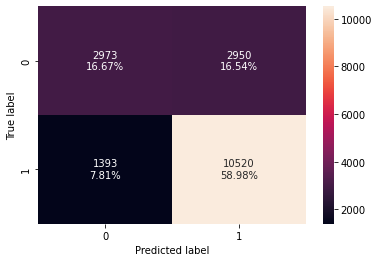

In [121]:
# Confusion matxrix for train data
confusion_matrix_sklearn(xgb_tuned,X_train,y_train)

In [122]:
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)

xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.756504,0.883069,0.780995,0.828901


#### Model performance on test data

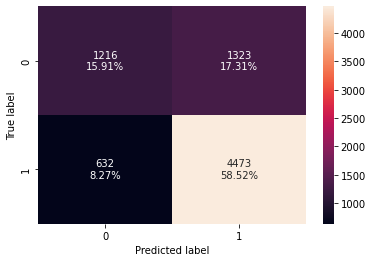

In [123]:
# Confusion matxrix for test data
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

In [124]:
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)

xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744244,0.8762,0.771739,0.820659


### Comments on tuned XGB classifier

- Performance after tuning in the XGB classifier is very similar to the pre-tuned model
- F1 score of test data is 0.82 and model is fairly generalized

## Stacking Classifier

In [125]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gb_classifier),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_classifier

stacking_classifier = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       min_samples_split=7,
                                                       n_estimators=25,
                                                       oob_score=True,
                                                       random_state=1))],
                   final_estimator=XGBClassifier(eval_metric='logloss',
                                                 random_state=1))

#### Model Performance on training data

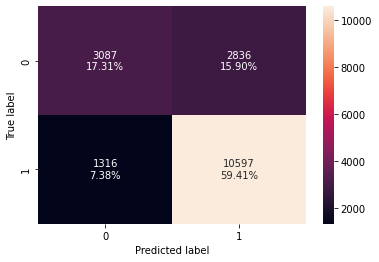

In [126]:
# Confusion matxrix for train data
confusion_matrix_sklearn(stacking_classifier,X_train,y_train)

In [127]:
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)

stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.767212,0.889532,0.788878,0.836187


#### Model performance on test data

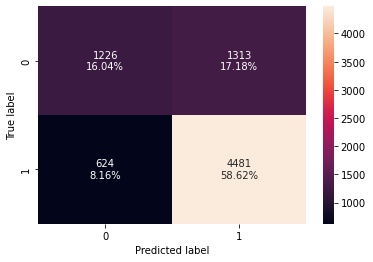

In [128]:
# Confusion matxrix for test data
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

In [129]:
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)

stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.746599,0.877767,0.773386,0.822277


### Comments on Stacking Classifier Models

- Stacking classifier model is not overfit and generalizes well on test data
- Stacking classifier model has the best performance on the test data amongst all models with a F1 score of 0.822
- Most of the boosting models and their tuned versions have very similar F1 scores and perform quite similarly (one exception is Ada Classifier tuned)

## Model Performance Comparison and Conclusions

### Training Data comparison of all models

In [130]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_train_perf.T,
        dtree_tuned_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_classifier_tuned_model_train_perf.T,
        rf_classifier_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.712548,0.985198,0.996187,0.999944,0.767997,0.738226,0.718995,0.758802,0.761045,0.756279,0.756504,0.767212
Recall,1.0,0.931923,0.985982,0.999916,0.999916,0.918492,0.887182,0.781247,0.883740,0.881894,0.883573,0.883069,0.889532
Precision,1.0,0.720067,0.991810,0.994407,1.000000,0.775533,0.760688,0.794587,0.783042,0.786318,0.780513,0.780995,0.788878
F1,1.0,0.812411,0.988887,0.997154,0.999958,0.840981,0.819080,0.787861,0.830349,0.831368,0.828852,0.828901,0.836187


### Test Data comparison of all models

In [131]:
# Test Data performance comparison

models_test_comp_df = pd.concat(
    [
        dtree_test_perf.T,
        dtree_tuned_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_classifier_tuned_model_test_perf.T,
        rf_classifier_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Test Data performance comparison:")
models_test_comp_df

Test Data performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.664835,0.706567,0.691523,0.724228,0.720827,0.739011,0.734301,0.716510,0.744767,0.744767,0.744636,0.744244,0.746599
Recall,0.742801,0.930852,0.764153,0.895397,0.832125,0.901077,0.885015,0.781391,0.876004,0.872674,0.877375,0.876200,0.877767
Precision,0.752232,0.715447,0.771711,0.743857,0.768869,0.755337,0.757799,0.791468,0.772366,0.773975,0.771576,0.771739,0.773386
F1,0.747487,0.809058,0.767913,0.812622,0.799247,0.821795,0.816481,0.786397,0.820927,0.820366,0.821082,0.820659,0.822277


## Summary of all Models

- Decision Tree, Bagging Classifier, tuned Bagging Classifer and Random Forest tend to highly overfit the training data and does not generalize well with test data

- Decision tree (tuned), Random forest (tuned), Adaboost (default and tuned), Gradient boost (default and tuned), XGBoost (default and tuned) and the stacking classifier are able to generalize quite well on unseen data

- Stacking classifier has the highest F1 score on test data but Random Forest(tuned), Gradient boost (default and tuned) and XGBoost(default and tuned) have very similar F1 scores

- Top 3 models in terms of F1 score on test data are Stacking Classifier, Tuned Random Forest and XGBoost Classifier

## Important Features of the Top Models 

### [XGBoost Classifier and Tuned Random Forest]



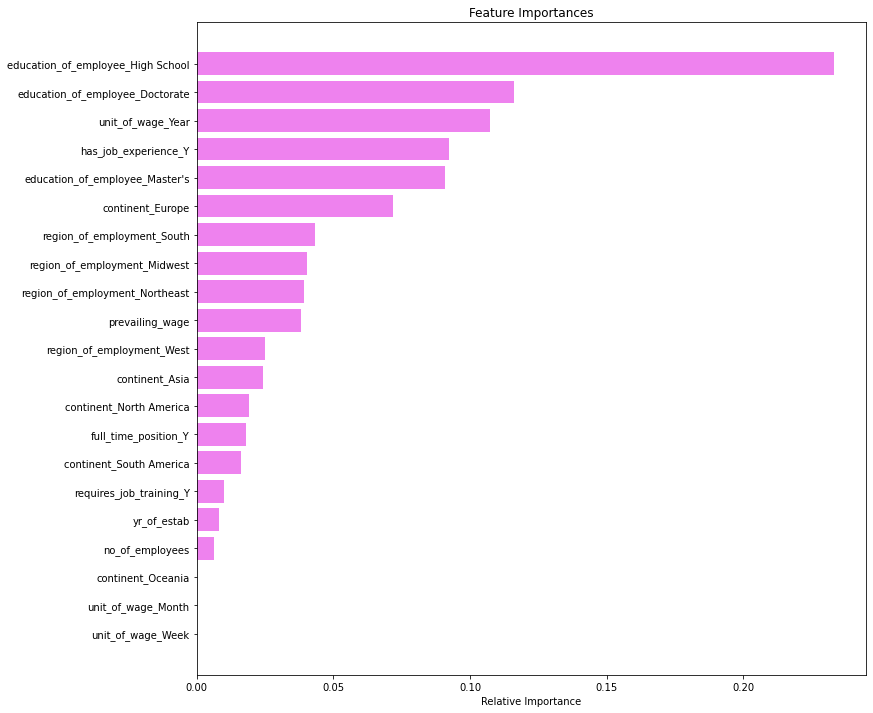

In [132]:
# Features of the XGBoost Classifier model (3rd best for F1 score)
feature_names = X_train.columns
importances = xgb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

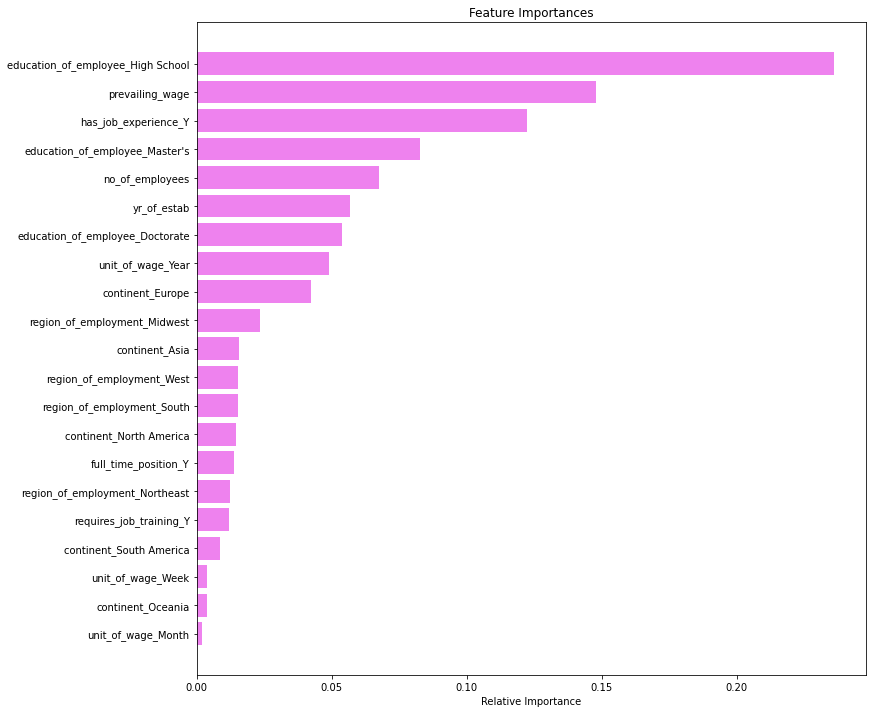

In [133]:
# Features of the tuned Random Forest Classifier model (2nd best for F1 score)
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Comments on the Feature importance of top models


- Findings of the key feature importances for the top models are consistent with observations made during exploratory data analyses

- Education of employee is a key attribute in predicting whether a visa will get certified or denied
- Other key attributes include unit of wage, prior job experience, continent of origin and intended region of employment

- P:S: NOTE: Stacking classifier does not have a feature importance attribute like these other 2 top performing ML models and hence its key features have not been visualized at the time of submission

## Conclusions/Actionable Insights and Recommendations

- We utilized a number of decison tree based bagging and boosting models to predict whether an employee's visa will get certified or denied

- The Stacking Classifier model and the other top models(see in earlier discussion) are able to give generalized prediction on training & testing datasets (not prone to overfitting) 

- These models are able to achieve an accuracy of 75% on test dataset and a F1 score of 82% on test dataset. The precision & recall are likewise both high (77% & 88% respectively)

- Some of the key variables that are deemed important for prediction as highlighted by the top predictive models are
  - Education of Employee
  - Unit of Wage
  - Prior job experience
  - Continent of origin
  - Region of Employment

- **Education of Employee** 
  - An employee with only high school degree has a nearly 66% chance of visa rejection
  - An employee with a doctorate degree has nearly 87% chance of visa approval while one with masters degree has nearly 79% chance of visa approval
  
- **Prior Job Experience**
  - An employee with prior job experience has a 75% chance of visa approval which drops down to only 56% chance of approval without prior job experience

- **Unit of Wage**
  - Employees earning an annual salary have a 70% chance of visa approval
  - Employees paid on a hourly basis have a 65% chance of visa rejection

- **Continent of Origin**
  - An employee coming from Europe has a nearly 80% chance of visa approval

- **Intended region of Employment**
  - A candidate seeking a job in the Midwestern US has a 75% chance of visa approval
  - A candidate seeking a job in the Southern US has a 70% chance of visa approval

- On the other hands, certain other attributes are not such key features in predicting visa approval/denial namely whether job is full-time/part-time, further requirement of job training etc

- Based on the above attributes, a suitable candidate profile can be constructed and Easy Visa can recommend a candiate the likelihood of either visa acceptance or visa denial. 

- For example, a doctorate holder from Europe with prior job experience and seeking a job with annual salary in the midwest may be a ideal candidate for visa approval with high degree of probability

- In contrast, a high school diploma holder from South America looking for a hourly job without prior job experience may be deemed high risk for visa rejection

- The predictive ML models does have some limitations particulary in correctly predicting visa rejections (48% correct visa rejection predictions) compared to correctly predicting visa acceptances  (88% correct visa acceptance predictions). This weakness could be kept in mind during candidate profiling so that candidates predicted to get a visa rejection do not inherently miss out an opportunity to go work in the US due to the model's limitations. 

- Furthermore, in times of acute labor shortage in US, model may be further re-evaulated to improve the accuracy of visa rejection predictions and thus not deny reasonable candidates from getting a visa approval 

- We recommend collecting additional data with other attributes like employee criminal history, employeee recommendation by individuals, Linkedin or other job networking site score etc that can help improve the predicting ability of the ML model. Easy Visa will do better if its ML models can successfully predict visa acceptances as well as visa rejections to a high degree of accuracy

- Easy visa can also outline what key features are useful for succesful visa approvals and what features can be improved in the employee profile to lower chances of rejection. This will be helpful for foreign individuals to better tailor their profile in getting visa approvals

- Easy visa can also work with representatives/hiring managers from different US regions to have a dynamic understanding of labor shortages/excesses in different US regions and thus figure out where candidates should or should not seek jobs for better chances of visa approval
  